In [1]:
import arcpy
import json,numpy
import matplotlib.pyplot as plt

In [2]:
arcpy.env.workspace = "../data/shp/bj"
feat = arcpy.ListFeatureClasses("*")
feat

['北京_line.shp', '北京_point.shp', '北京_polygon.shp']

In [21]:
with arcpy.da.SearchCursor(feat[2],["Shape@","name"],"name ='海淀区'") as cursor:
    for row in cursor:
        print(row[0],row[1])

<geoprocessing describe geometry object object at 0x00000119C9988B20> 海淀区


In [4]:
ext = row[0].extent

In [5]:
print(ext.XMax,ext.XMin,ext.YMax,ext.YMin)

116.38607000000006 116.04262000000006 40.15470000000005 39.890900000000045


In [6]:
x = numpy.random.uniform(ext.XMin,ext.XMax,10000)
y = numpy.random.uniform(ext.YMin,ext.YMax,10000)

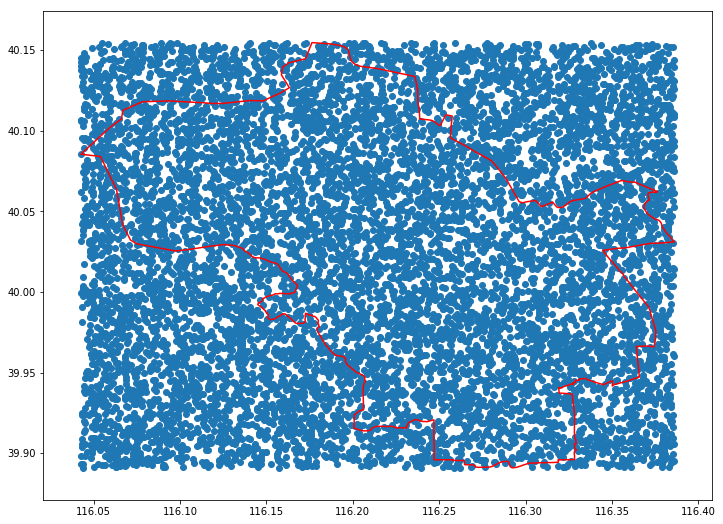

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(x,y)
js = json.loads(row[0].JSON)
px = [r[0] for r in js["rings"][0]]
py = [r[1] for r in js["rings"][0]]
plt.plot(px,py,color="red")

In [22]:
%%time
isc = []
for i in range(10000):
    p = arcpy.Point(x[i],y[i])
    isc.append(row[0].contains(p))

IndexError: index 7 is out of bounds for axis 0 with size 7

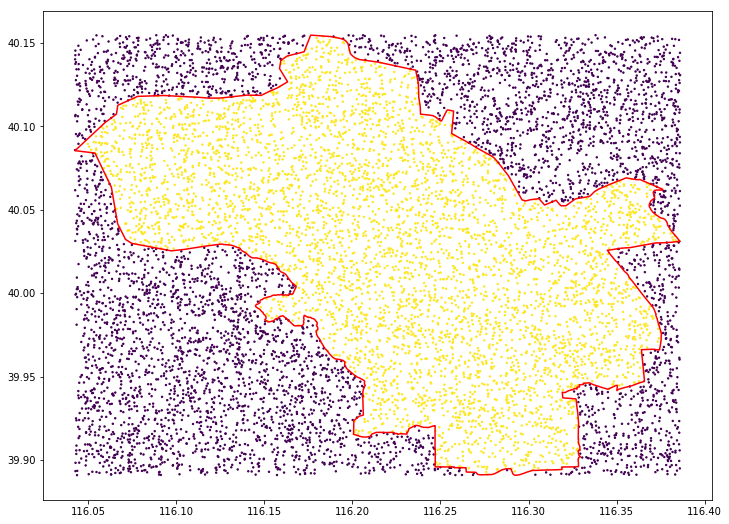

In [11]:
plt.figure(figsize=(12,9))
plt.scatter(x,y,2,isc)
plt.plot(px,py,color="red")

In [17]:
rings = []
p = []
for i in range(100):
    cnt = numpy.random.randint(4,10)
    x = numpy.random.uniform(ext.XMin,ext.XMax,cnt)
    y = numpy.random.uniform(ext.YMin,ext.YMax,cnt)
    arr = arcpy.Array()
    for i in range(cnt):
        arr.add(arcpy.Point(x[i],y[i]))
    arr.add(arcpy.Point(x[0],y[0]))
    p = arcpy.Polygon(arr)
    rings.append(p)

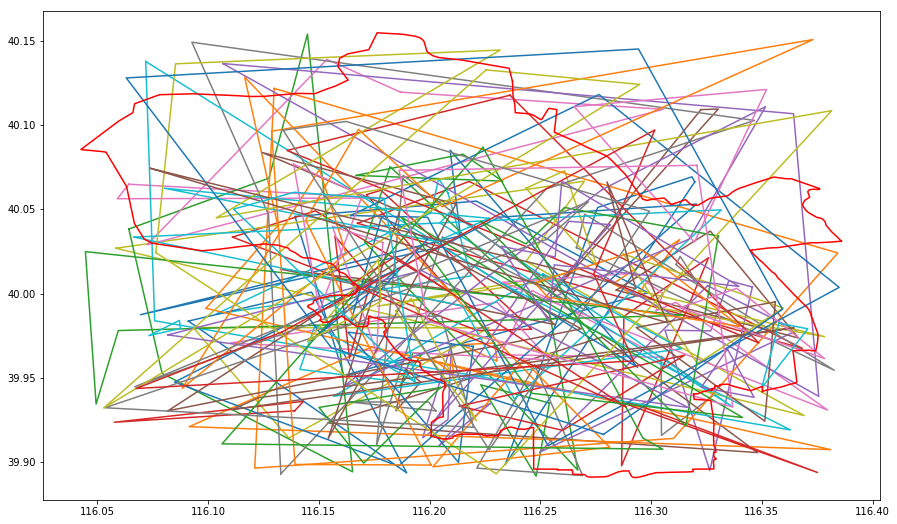

In [18]:
plt.figure(figsize=(15,9))
for r in rings[:]:
    js = json.loads(r.JSON)
    px2 = [r[0] for r in js["rings"][0]]
    py2 = [r[1] for r in js["rings"][0]]
    plt.plot(px2,py2)
plt.plot(px,py,color="red")

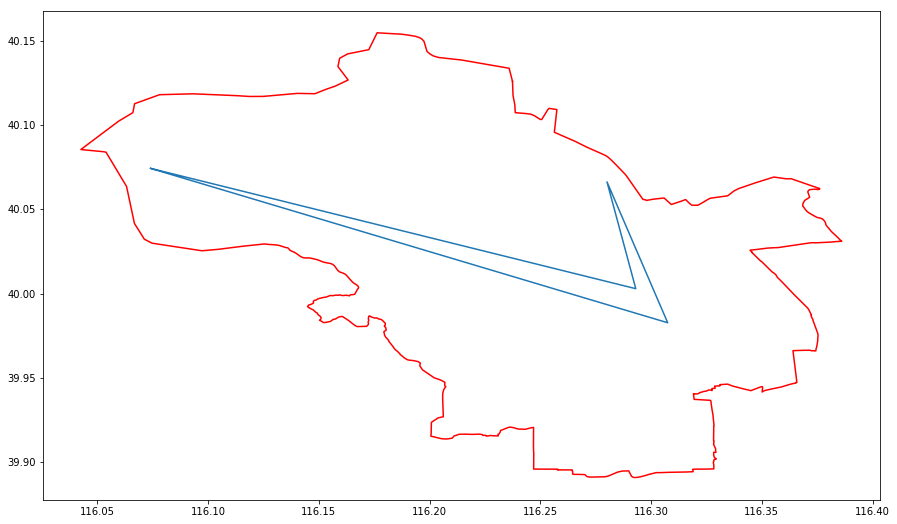

In [19]:
plt.figure(figsize=(15,9))
for r in rings[:]:
    js = json.loads(r.JSON)
    px2 = [r[0] for r in js["rings"][0]]
    py2 = [r[1] for r in js["rings"][0]]
    if row[0].contains(r):
        plt.plot(px2,py2)
plt.plot(px,py,color="red")